In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
x, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0,-1,1)
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [3]:
x.shape

(50, 2)

In [20]:
x

array([[  7.12731332,  -4.4394424 ],
       [  6.68873898,  -2.44840134],
       [ -1.1004791 ,  -7.78436803],
       [  3.99337867,  -4.90451269],
       [ -1.8171622 ,  -9.22909875],
       [ -2.05521901, -10.23141199],
       [  4.20397723,  -3.61164749],
       [ -0.21804625,  -9.21962706],
       [  5.19327641,  -6.38845134],
       [ -1.83682056,  -8.21952131],
       [  7.54287406,  -5.35284052],
       [  4.88954545,  -3.38947816],
       [ -1.76558632,  -9.34943001],
       [  5.22597752,  -5.5503347 ],
       [  6.64886376,  -4.46203664],
       [  8.09408178,  -4.8068287 ],
       [  6.32916529,  -5.32177094],
       [  5.80670214,  -5.14475233],
       [  5.67381136,  -3.33963413],
       [  7.20870152,  -6.04176429],
       [ -3.25014567,  -8.67304842],
       [ -1.22856371,  -7.96317275],
       [ -3.29446134,  -7.45269997],
       [ -1.81294631,  -7.55640734],
       [ -1.53809058,  -8.77828137],
       [ -3.78288052,  -9.38303174],
       [ -2.73473836,  -9.34777956],
 

In [9]:
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,iters=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iters = iters
        self.w = None
        self.b = None
    def fit(self,x,y):
        y_ = np.where(y <= 0,-1,1)
        n_samples,n_features = x.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for i in range(self.iters):
            for idx,x_i in enumerate(x):
                condition = y_[idx]*(np.dot(x_i,self.w)-self.b)>=1
                if condition:
                    self.w -=self.lr *(2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr *(2*self.lambda_param  * self.w - np.dot(x_i,y_[idx]))
                    self.b -= self.lr*y_[idx]
                
    def predict(self,x):
        linear_out = np.dot(x,self.w) - self.b
        return np.sign(linear_out)

In [10]:
clf = SVM()
clf.fit(x,y)

In [12]:
print(clf.w, clf.b)

[0.45257302 0.25017548] -0.8350000000000006


In [19]:
clf.predict(x)

array([ 1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.])

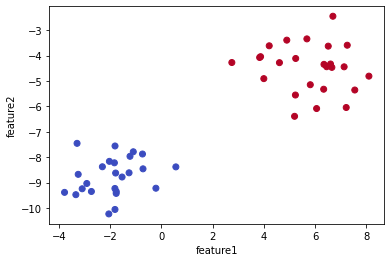

In [33]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()